[*********************100%%**********************]  1 of 1 completed


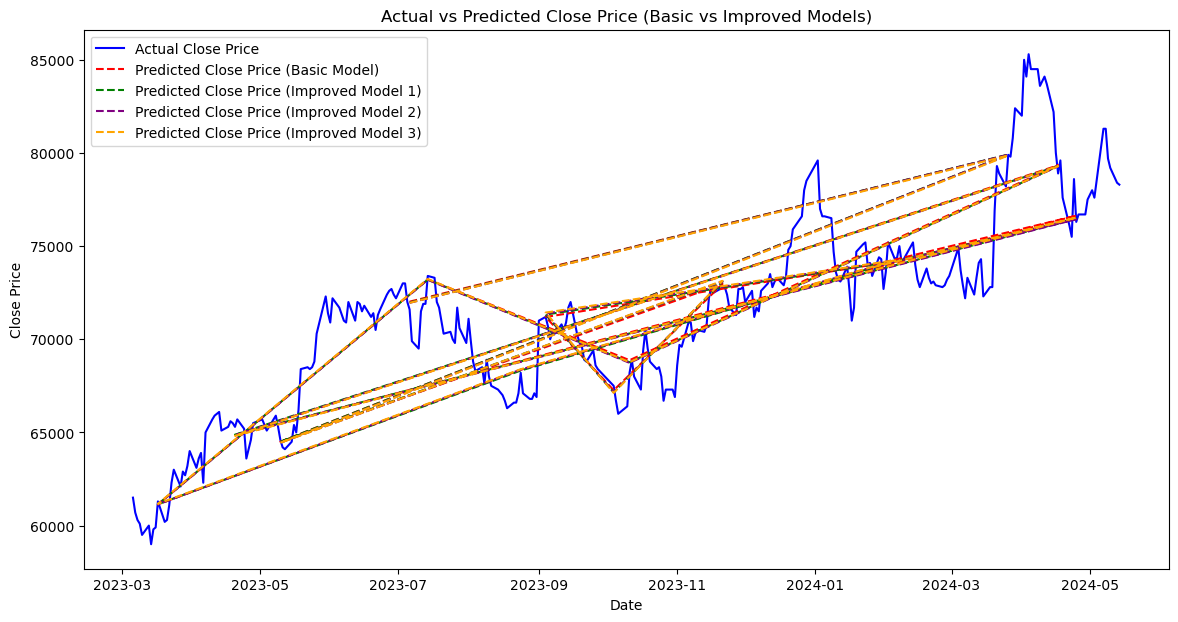

Basic Model Mean Squared Error: 112286.73812206501
Improved Model 1 Mean Squared Error: 92539.80449306213
Improved Model 2 Mean Squared Error: 92455.89814541426
Improved Model 3 Mean Squared Error: 101453.07245026043


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving average
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Data download for given period
ticker = '005930.KS'  # Samsung Electronics
data = yf.download(ticker, start='2022-05-15', end='2024-05-15')

# Calculate RSI, Moving Averages, MACD
data['RSI'] = calculate_rsi(data)
data['MA50'] = calculate_moving_average(data, 50)
data['MA200'] = calculate_moving_average(data, 200)
data['MACD'], data['MACD_Signal'] = calculate_macd(data)
data = data.dropna()

# Splitting data
train_data, test_data = train_test_split(data, test_size=0.05, random_state=42, shuffle=True)

# Basic Model: Using Open, High, Low, Volume to predict Close
X_train_basic = train_data[['Open', 'High', 'Low', 'Volume']]
y_train_basic = train_data['Close']
X_test_basic = test_data[['Open', 'High', 'Low', 'Volume']]
y_test_basic = test_data['Close']

# Normalizing the data
scaler_basic = StandardScaler()
X_train_basic = scaler_basic.fit_transform(X_train_basic)
X_test_basic = scaler_basic.transform(X_test_basic)

# Training the basic model
model_basic = LinearRegression()
model_basic.fit(X_train_basic, y_train_basic)

# Prediction for the basic model
y_pred_basic = model_basic.predict(X_test_basic)

# Calculating MSE for the basic model
mse_basic = mean_squared_error(y_test_basic, y_pred_basic)

# Improved Model 1: Adding RSI
X_train_improved1 = train_data[['Open', 'High', 'Low', 'Volume', 'RSI']]
y_train_improved1 = train_data['Close']
X_test_improved1 = test_data[['Open', 'High', 'Low', 'Volume', 'RSI']]
y_test_improved1 = test_data['Close']

# Normalizing the data
scaler_improved1 = StandardScaler()
X_train_improved1 = scaler_improved1.fit_transform(X_train_improved1)
X_test_improved1 = scaler_improved1.transform(X_test_improved1)

# Training the improved model 1
model_improved1 = LinearRegression()
model_improved1.fit(X_train_improved1, y_train_improved1)

# Prediction for the improved model 1
y_pred_improved1 = model_improved1.predict(X_test_improved1)

# Calculating MSE for the improved model 1
mse_improved1 = mean_squared_error(y_test_improved1, y_pred_improved1)

# Improved Model 2: Adding Moving Averages
X_train_improved2 = train_data[['Open', 'High', 'Low', 'Volume', 'RSI', 'MA50', 'MA200']]
y_train_improved2 = train_data['Close']
X_test_improved2 = test_data[['Open', 'High', 'Low', 'Volume', 'RSI', 'MA50', 'MA200']]
y_test_improved2 = test_data['Close']

# Normalizing the data
scaler_improved2 = StandardScaler()
X_train_improved2 = scaler_improved2.fit_transform(X_train_improved2)
X_test_improved2 = scaler_improved2.transform(X_test_improved2)

# Training the improved model 2
model_improved2 = LinearRegression()
model_improved2.fit(X_train_improved2, y_train_improved2)

# Prediction for the improved model 2
y_pred_improved2 = model_improved2.predict(X_test_improved2)

# Calculating MSE for the improved model 2
mse_improved2 = mean_squared_error(y_test_improved2, y_pred_improved2)

# Improved Model 3: Adding MACD
X_train_improved3 = train_data[['Open', 'High', 'Low', 'Volume', 'RSI', 'MA50', 'MA200', 'MACD', 'MACD_Signal']]
y_train_improved3 = train_data['Close']
X_test_improved3 = test_data[['Open', 'High', 'Low', 'Volume', 'RSI', 'MA50', 'MA200', 'MACD', 'MACD_Signal']]
y_test_improved3 = test_data['Close']

# Normalizing the data
scaler_improved3 = StandardScaler()
X_train_improved3 = scaler_improved3.fit_transform(X_train_improved3)
X_test_improved3 = scaler_improved3.transform(X_test_improved3)

# Training the improved model 3
model_improved3 = LinearRegression()
model_improved3.fit(X_train_improved3, y_train_improved3)

# Prediction for the improved model 3
y_pred_improved3 = model_improved3.predict(X_test_improved3)

# Calculating MSE for the improved model 3
mse_improved3 = mean_squared_error(y_test_improved3, y_pred_improved3)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close Price', color='blue')
plt.plot(test_data.index, y_pred_basic, label='Predicted Close Price (Basic Model)', color='red', linestyle='--')
plt.plot(test_data.index, y_pred_improved1, label='Predicted Close Price (Improved Model 1)', color='green', linestyle='--')
plt.plot(test_data.index, y_pred_improved2, label='Predicted Close Price (Improved Model 2)', color='purple', linestyle='--')
plt.plot(test_data.index, y_pred_improved3, label='Predicted Close Price (Improved Model 3)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Basic vs Improved Models)')
plt.legend()
plt.show()

print(f'Basic Model Mean Squared Error: {mse_basic}')
print(f'Improved Model 1 Mean Squared Error: {mse_improved1}')
print(f'Improved Model 2 Mean Squared Error: {mse_improved2}')
print(f'Improved Model 3 Mean Squared Error: {mse_improved3}')


[*********************100%%**********************]  1 of 1 completed


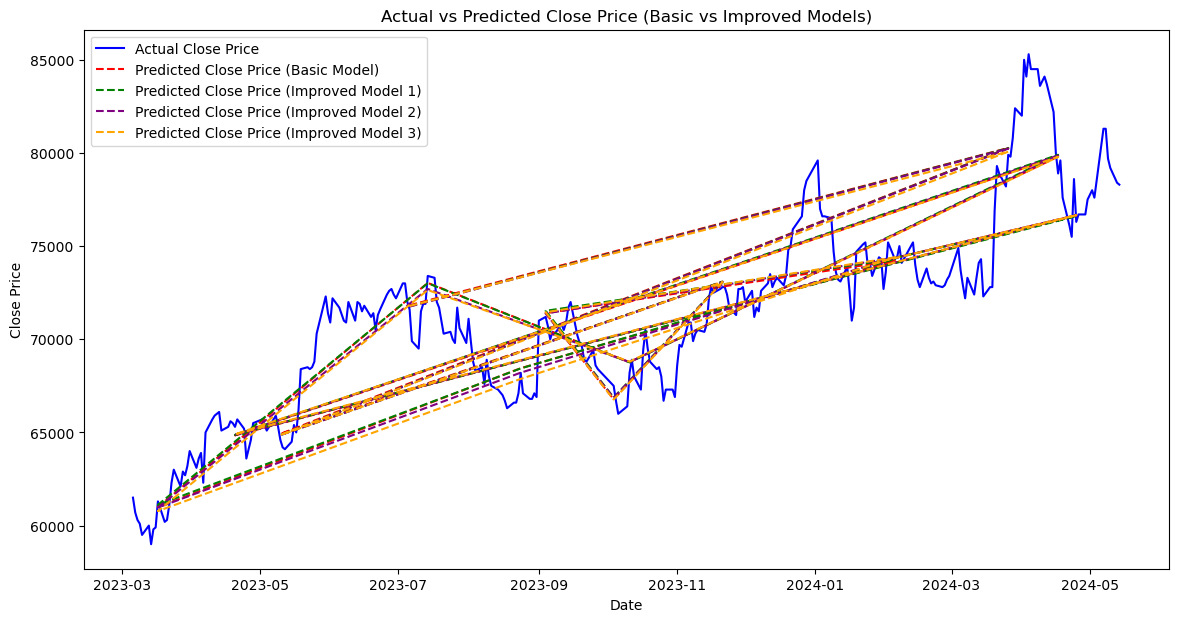

Basic Model Mean Squared Error: 211550.86666666667
Improved Model 1 Mean Squared Error: 208387.26666666666
Improved Model 2 Mean Squared Error: 223083.46666666667
Improved Model 3 Mean Squared Error: 243859.13333333333


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving average
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Data download for given period
ticker = '005930.KS'  # Samsung Electronics
data = yf.download(ticker, start='2022-05-15', end='2024-05-15')

# Calculate RSI, Moving Averages, MACD
data['RSI'] = calculate_rsi(data)
data['MA50'] = calculate_moving_average(data, 50)
data['MA200'] = calculate_moving_average(data, 200)
data['MACD'], data['MACD_Signal'] = calculate_macd(data)
data = data.dropna()

# Splitting data
train_data, test_data = train_test_split(data, test_size=0.05, random_state=42, shuffle=True)

# Feature sets
features_basic = ['Open', 'High', 'Low', 'Volume']
features_improved1 = features_basic + ['RSI']
features_improved2 = features_improved1 + ['MA50', 'MA200']
features_improved3 = features_improved2 + ['MACD', 'MACD_Signal']

# Function to train and evaluate a model
def train_and_evaluate(features):
    X_train = train_data[features]
    y_train = train_data['Close']
    X_test = test_data[features]
    y_test = test_data['Close']

    # Normalizing the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Calculating MSE
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, mse

# Evaluate models
y_pred_basic, mse_basic = train_and_evaluate(features_basic)
y_pred_improved1, mse_improved1 = train_and_evaluate(features_improved1)
y_pred_improved2, mse_improved2 = train_and_evaluate(features_improved2)
y_pred_improved3, mse_improved3 = train_and_evaluate(features_improved3)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close Price', color='blue')
plt.plot(test_data.index, y_pred_basic, label='Predicted Close Price (Basic Model)', color='red', linestyle='--')
plt.plot(test_data.index, y_pred_improved1, label='Predicted Close Price (Improved Model 1)', color='green', linestyle='--')
plt.plot(test_data.index, y_pred_improved2, label='Predicted Close Price (Improved Model 2)', color='purple', linestyle='--')
plt.plot(test_data.index, y_pred_improved3, label='Predicted Close Price (Improved Model 3)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Basic vs Improved Models)')
plt.legend()
plt.show()

print(f'Basic Model Mean Squared Error: {mse_basic}')
print(f'Improved Model 1 Mean Squared Error: {mse_improved1}')
print(f'Improved Model 2 Mean Squared Error: {mse_improved2}')
print(f'Improved Model 3 Mean Squared Error: {mse_improved3}')


[*********************100%%**********************]  1 of 1 completed


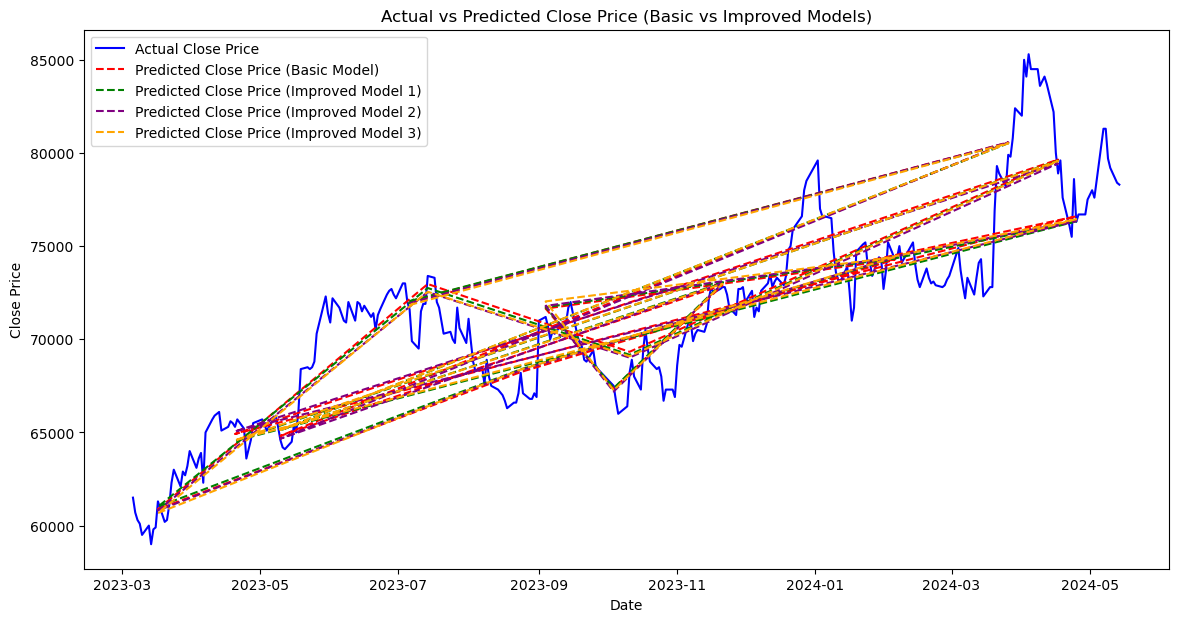

Basic Model Mean Squared Error: 269936.46680799645
Improved Model 1 Mean Squared Error: 280125.9619845713
Improved Model 2 Mean Squared Error: 248919.54704345233
Improved Model 3 Mean Squared Error: 340991.56462466903


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving average
def calculate_moving_average(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Data download for given period
ticker = '005930.KS'  # Samsung Electronics
data = yf.download(ticker, start='2022-05-15', end='2024-05-15')

# Calculate RSI, Moving Averages, MACD
data['RSI'] = calculate_rsi(data)
data['MA50'] = calculate_moving_average(data, 50)
data['MA200'] = calculate_moving_average(data, 200)
data['MACD'], data['MACD_Signal'] = calculate_macd(data)
data = data.dropna()

# Splitting data
train_data, test_data = train_test_split(data, test_size=0.05, random_state=42, shuffle=True)

# Feature sets
features_basic = ['Open', 'High', 'Low', 'Volume']
features_improved1 = features_basic + ['RSI']
features_improved2 = features_improved1 + ['MA50', 'MA200']
features_improved3 = features_improved2 + ['MACD', 'MACD_Signal']

# Function to train and evaluate a model
def train_and_evaluate(features):
    X_train = train_data[features]
    y_train = train_data['Close']
    X_test = test_data[features]
    y_test = test_data['Close']

    # Normalizing the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training the Gradient Boosting model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Calculating MSE
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, mse

# Evaluate models
y_pred_basic, mse_basic = train_and_evaluate(features_basic)
y_pred_improved1, mse_improved1 = train_and_evaluate(features_improved1)
y_pred_improved2, mse_improved2 = train_and_evaluate(features_improved2)
y_pred_improved3, mse_improved3 = train_and_evaluate(features_improved3)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Close Price', color='blue')
plt.plot(test_data.index, y_pred_basic, label='Predicted Close Price (Basic Model)', color='red', linestyle='--')
plt.plot(test_data.index, y_pred_improved1, label='Predicted Close Price (Improved Model 1)', color='green', linestyle='--')
plt.plot(test_data.index, y_pred_improved2, label='Predicted Close Price (Improved Model 2)', color='purple', linestyle='--')
plt.plot(test_data.index, y_pred_improved3, label='Predicted Close Price (Improved Model 3)', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Basic vs Improved Models)')
plt.legend()
plt.show()

print(f'Basic Model Mean Squared Error: {mse_basic}')
print(f'Improved Model 1 Mean Squared Error: {mse_improved1}')
print(f'Improved Model 2 Mean Squared Error: {mse_improved2}')
print(f'Improved Model 3 Mean Squared Error: {mse_improved3}')
